# This files runs the entire calibration pipeline for the pa1 debug-a dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import LinAlg as LA

import Debug

In [2]:
calbody_filepath = r'.\PA_1_Data\pa1-debug-a-calbody.txt'
calreadings_filepath = r'.\PA_1_Data\pa1-debug-a-calreadings.txt'
empivot_filepath = r'.\PA_1_Data\pa1-debug-a-empivot.txt'
optpivot_filepath = r'.\PA_1_Data\pa1-debug-a-optpivot.txt'

output_filepath = r'.\PA_1_Data\pa1-debug-a-output1.txt'

# 1.a Compute FD \
the transformation from the optical tracker to the EM tracker \
eg: D_j = FD \cdot d_j

d_i Vectors (Optical Markers on base of EM Tracker, wrt EM tracker):

Vector(0.00, 0.00, 0.00)

Vector(0.00, 0.00, 150.00)

Vector(0.00, 150.00, 0.00)

Vector(0.00, 150.00, 150.00)

Vector(150.00, 0.00, 0.00)

Vector(150.00, 0.00, 150.00)

Vector(150.00, 150.00, 0.00)

Vector(150.00, 150.00, 150.00)

a_i Vectors (Optical Markers on Calibration Object, wrt Calibration Object):
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 250.00)
Vector(0.00, 250.00, 0.00)
Vector(0.00, 250.00, 250.00)
Vector(250.00, 0.00, 0.00)
Vector(250.00, 0.00, 250.00)
Vector(250.00, 250.00, 0.00)
Vector(250.00, 250.00, 250.00)

c_i Vectors (EM Markers on Calibration Object, wrt Calibration Object):
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 125.00)
Vector(0.00, 0.00, 250.00)
Vector(0.00, 125.00, 0.00)
Vector(0.00, 125.00, 125.00)
Vector(0.00, 125.00, 250.00)
Vector(0.00, 250.00, 0.00)
Vector(0.00, 250.00, 125.00)
Vector(0.00, 250.00, 250.00)
Vector(125.00, 0.00, 0.00)
Vector(125.00, 0.00, 125.00)
Vector(125.00, 0.00

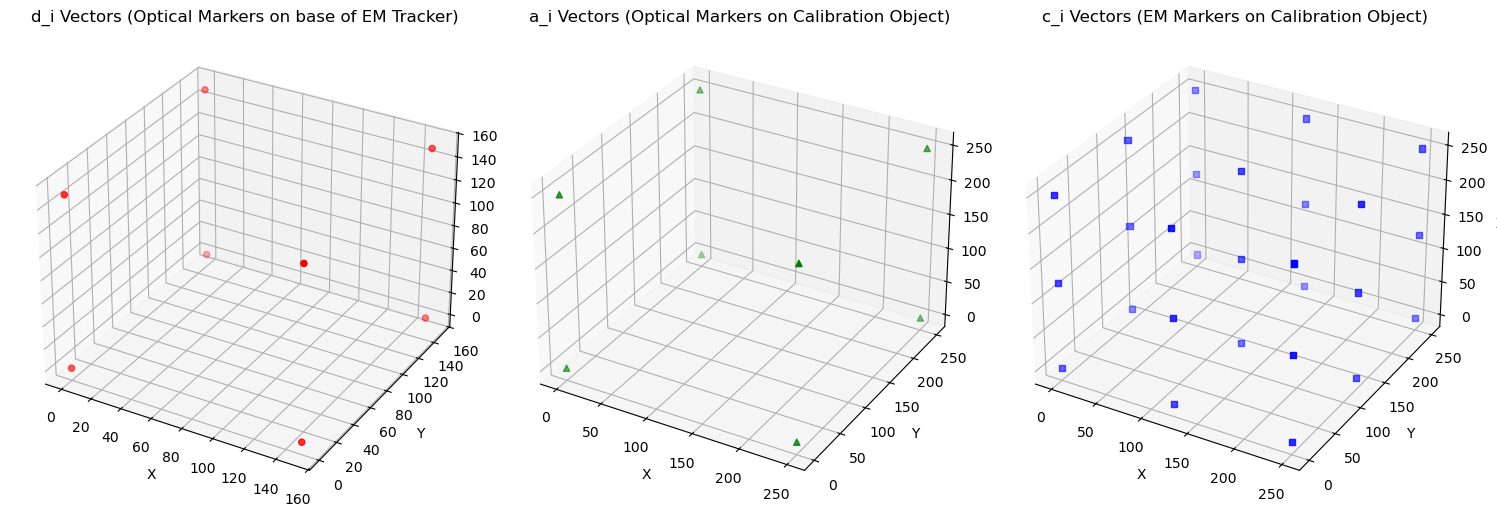

In [3]:
d_vectors, a_vectors, c_vectors, N_D, N_A, N_C = io.read_calbody_file(calbody_filepath)

# Output the vectors
print("d_i Vectors (Optical Markers on base of EM Tracker, wrt EM tracker):")
for vec in d_vectors:
    print()
    print(vec)
assert len(d_vectors) == N_D

print("\na_i Vectors (Optical Markers on Calibration Object, wrt Calibration Object):")
for vec in a_vectors:
    print(vec)
assert len(a_vectors) == N_A

print("\nc_i Vectors (EM Markers on Calibration Object, wrt Calibration Object):")
for vec in c_vectors:
    print(vec)
assert len(c_vectors) == N_C

LA.visualize_vectors(d_vectors, a_vectors, c_vectors)

In [4]:
frames_data = io.read_calreadings_file(calreadings_filepath)

# Output the vectors for each frame
for frame_num, frame_data in frames_data.items():
    print(f"Frame {frame_num}:")

    print("  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):")
    for vec in frame_data['D_vectors']:
        print(f"    {vec}")

    print("  A_i Vectors (Optical Markers on Calibration Object, wrt Optical Tracker ):")
    for vec in frame_data['A_vectors']:
        print(f"    {vec}")

    print("  C_i Vectors (EM Markers on Calibration Object, wrt EM tracker):")
    for vec in frame_data['C_vectors']:
        print(f"    {vec}")

Frame 1:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)
    Vector(150.00, 150.00, -1350.00)
  A_i Vectors (Optical Markers on Calibration Object, wrt Optical Tracker ):
    Vector(209.30, 208.87, -1288.97)
    Vector(205.19, 207.84, -1039.00)
    Vector(211.50, 458.85, -1287.91)
    Vector(207.39, 457.83, -1037.95)
    Vector(459.26, 206.65, -1284.87)
    Vector(455.15, 205.63, -1034.91)
    Vector(461.45, 456.64, -1283.81)
    Vector(457.35, 455.62, -1033.85)
  C_i Vectors (EM Markers on Calibration Object, wrt EM tracker):
    Vector(209.30, 208.87, 211.03)
    Vector(207.25, 208.35, 336.01)
    Vector(205.19, 207.84, 461.00)
    Vector(210.40, 333.86, 211.56)
    Vector(208.35, 333.35, 336.54)
    Vector(206.29, 332.84, 46

In [5]:
F_D_point_cloud = LA.perform_calibration_registration_for_frames(frames_data, d_vectors, vector_type='D')

# Output the registration results
for frame_num, result in F_D_point_cloud.items():
    print(f"Frame {frame_num}:")
    print(f"  Rotation matrix (R):\n{result.rotation}")
    print(f"  Translation vector (t): {result.translation}")


Frame 1:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100939 -0.4782204 ]]
  Translation vector (t): [  0.60587743   0.60587743 -12.42608778]
Frame 2:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100939 -0.4782204 ]]
  Translation vector (t): [  0.60587743   0.60587743 -12.42608778]
Frame 3:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100939 -0.4782204 ]]
  Translation vector (t): [  0.60587743   0.60587743 -12.42608778]
Frame 4:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100939 -0.4782204 ]]
  Translation vector (t): [  0.60587743   0.60587743 -12.42608778]
Frame 5:
  Rotation matrix (R):
[[ 0.26088979 -0.73911017  0.6210094 ]
 [-0.73911023  0.26088981  0.62100932]
 [-0.62100933 -0.62100

In [6]:
transformed_d_vectors = {}

for frame_num, frame in F_D_point_cloud.items():
    transformed_vectors = LA.transform_points(frame, d_vectors)
    transformed_d_vectors[frame_num] = transformed_vectors

# Print the transformed vectors along with corresponding D_vectors for each frame
for frame_num, vectors in transformed_d_vectors.items():
    print(f"Frame {frame_num}:")
    print("  Original D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):")
    for vec in frames_data[frame_num]['D_vectors']:
        print(f"    {vec}")
    print("  Transformed d_i Vectors:")
    for vec in vectors:
        print(f"    {vec}")

Frame 1:
  Original D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)
    Vector(150.00, 150.00, -1350.00)
  Transformed d_i Vectors:
    Vector(0.61, 0.61, -12.43)
    Vector(93.76, 93.76, -84.16)
    Vector(-110.26, 39.74, -105.58)
    Vector(-17.11, 132.89, -177.31)
    Vector(39.74, -110.26, -105.58)
    Vector(132.89, -17.11, -177.31)
    Vector(-71.13, -71.13, -198.73)
    Vector(22.02, 22.02, -270.46)
Frame 2:
  Original D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)


# 1.b Compute F_A 
Transformation from the optical tracker to calibration object

Frame 1 RMSE: 612.4879760742188


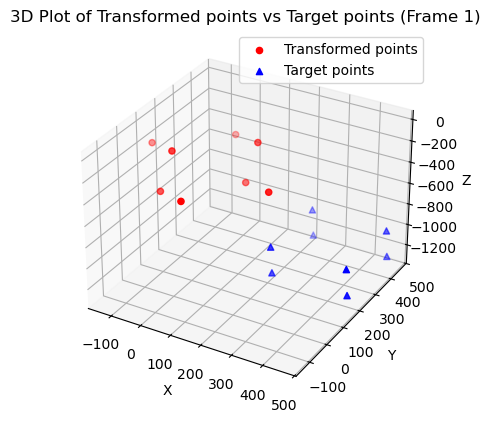

Frame 2 RMSE: 490.71893310546875


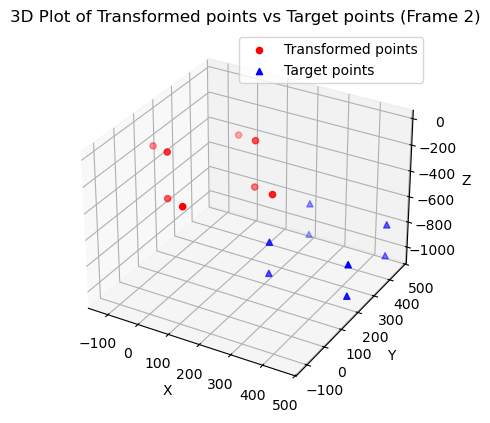

Frame 3 RMSE: 657.6939086914062


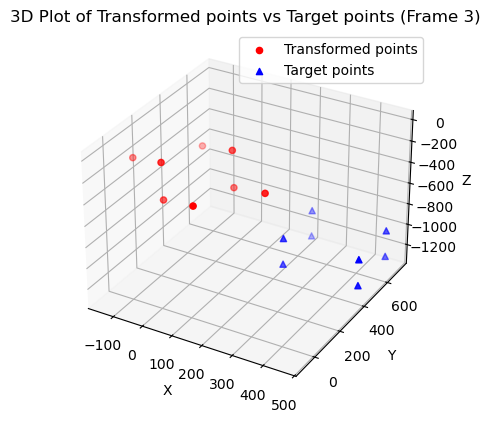

Frame 4 RMSE: 545.2455444335938


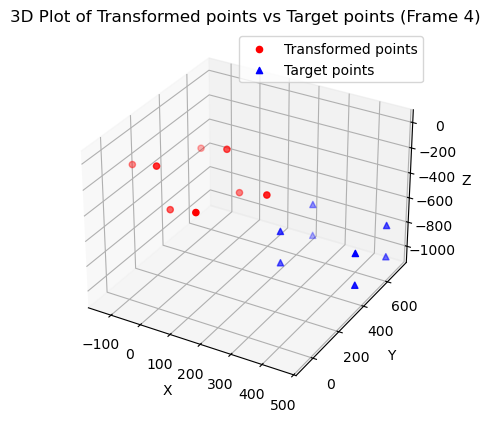

Frame 5 RMSE: 655.4930419921875


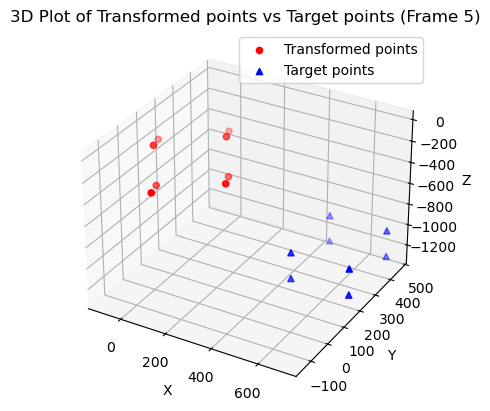

Frame 6 RMSE: 540.4946899414062


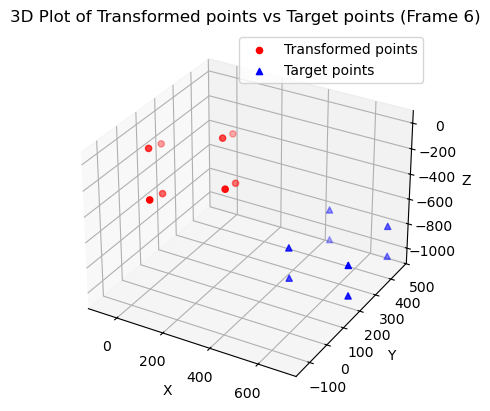

Frame 7 RMSE: 699.7698974609375


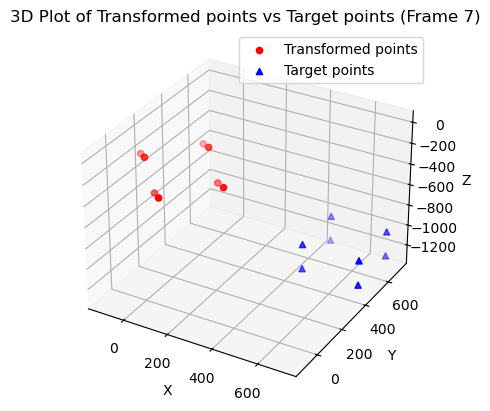

Frame 8 RMSE: 589.36376953125


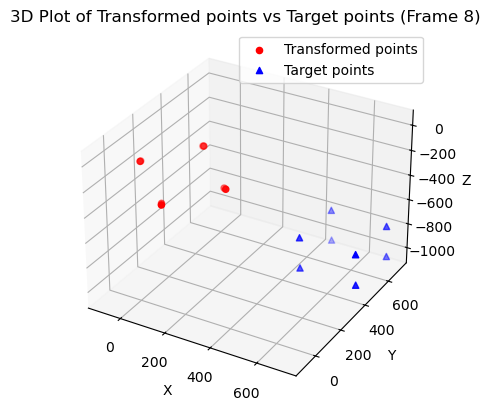

In [7]:
F_A_point_cloud = LA.perform_calibration_registration_for_frames(frames_data, a_vectors, vector_type='A')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_A_point_cloud.items():
    # Extract the source points (calbody a_vectors) for transformation
    a_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in a_vectors]  # Source points (a_vectors)

    # Extract the target points (A_points) from calreadings_frames
    A_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['A_vectors']]  # Target points
      
    # Apply the transformation to a_points
    transformed_a_points = LA.transform_points(frame, a_points)

    # Compute the RMSE between the transformed a_points and A_points
    transformed_array = np.array([v.as_array() for v in transformed_a_points])
    target_array = np.array([v.as_array() for v in A_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")

    # Plot the transformed a_points vs target A_points
    LA.plot_3d_transformed_vs_target(frame_num, transformed_a_points, A_points)